In [69]:
import pandas as pd

uri = "https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv"
dados = pd.read_csv(uri)
dados.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [70]:
# renomeando
map = {
    'expected_hours' : 'horas_esperadas',
    'price' : 'preco',
    'unfinished' : 'nao_finalizado'
}
dados = dados.rename(columns = map)
dados.head()

,nao_finalizado,horas_esperadas,preco
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [71]:
# troca de valores
swap = {
    0 : 1,
    1 : 0
}
dados['finalizado'] = dados.nao_finalizado.map(swap)
dados.head()

,nao_finalizado,horas_esperadas,preco,finalizado
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0


In [72]:
dados.tail()

,nao_finalizado,horas_esperadas,preco,finalizado
2152,0,80,7518,1
2153,1,52,1332,0
2154,0,40,473,1
2155,0,75,5324,1
2156,1,37,377,0


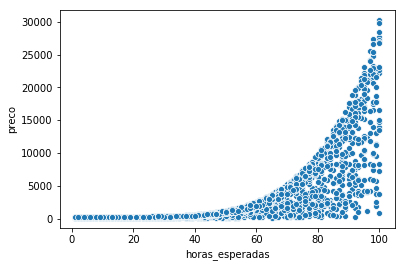

In [73]:
# visualizar a quantidade de horas esperadas por preco 
import seaborn as sns
sns.scatterplot(x="horas_esperadas", y="preco", data=dados)


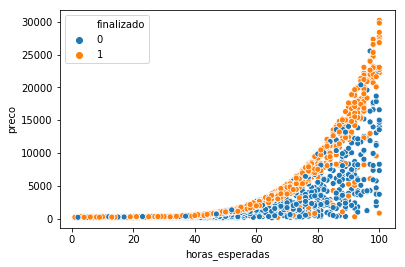

In [74]:
# colore o gráfico de acordo com a coluna "finalizado"
sns.scatterplot(x="horas_esperadas", y="preco", hue="finalizado", data=dados)


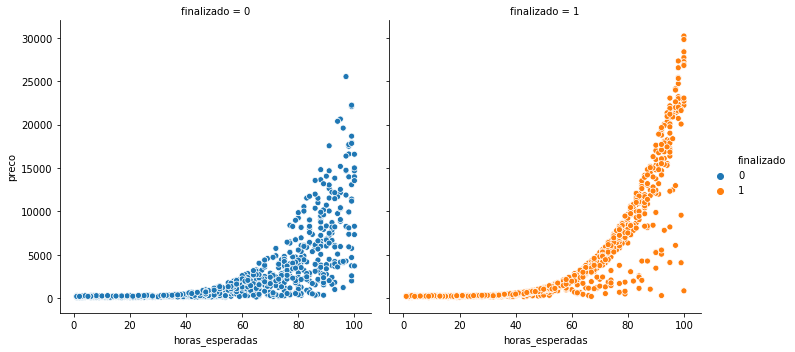

In [75]:
# plot relativo
# ao invés de cores, quero colunas diferentes
sns.relplot(x="horas_esperadas", y="preco", hue="finalizado", col="finalizado", data=dados)


In [76]:
x = dados[['horas_esperadas', 'preco']]
y = dados['finalizado']

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

SEED = 9
# usa o X e o Y pra fazer o split de teste e de treino
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    random_state = SEED, test_size = 0.25, # 25%
                                                    stratify = y) # estratificado
print('Treinaremos com %d elementos e testaremos com %d elementos' % (len(x_train), len(x_test)))

modelo = LinearSVC() #cria modelo linear
modelo.fit(x_train, y_train) # treina o modelo 
previsoes = modelo.predict(x_test) # faz predição

acuracia = accuracy_score(y_test, previsoes) * 100  # testa a acurácia
print('A acurácia foi %.2f%%' % acuracia)

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 52.78%


c:\users\bruno.silveira\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [78]:
import numpy as np
# baseline
baseline = np.ones(540)
acuracia = accuracy_score(y_test, previsoes_de_base) * 100
print('A acurácia do algoritmo de baseline foi %.2f%%' % acuracia)

A acurácia do algoritmo de baseline foi 52.59%


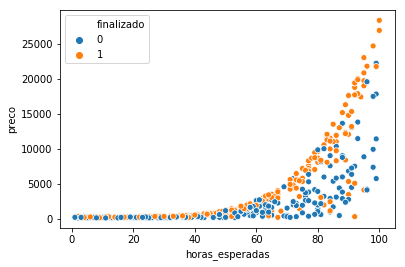

In [79]:
# analisando o teste
sns.scatterplot(x="horas_esperadas", y="preco", hue=y_test, data=x_test)  

In [80]:
x_min = x_test.horas_esperadas.min()
x_max = x_test.horas_esperadas.max()
y_min = x_test.preco.min()
y_max = x_test.preco.max()
print(x_min, x_max, y_min, y_max)

1 100 101 28398


In [81]:
pixels = 100
eixo_x = np.arange(x_min, x_max,(x_max - x_min)/pixels)
eixo_y = np.arange(y_min, y_max,(y_max - y_min)/pixels)

In [82]:
xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]
pontos

array([[1.000000e+00, 1.010000e+02],
       [1.990000e+00, 1.010000e+02],
       [2.980000e+00, 1.010000e+02],
       ...,
       [9.703000e+01, 2.811503e+04],
       [9.802000e+01, 2.811503e+04],
       [9.901000e+01, 2.811503e+04]])

In [83]:
Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)
Z

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=int64)

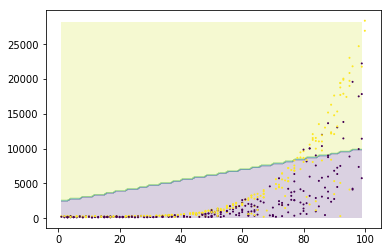

In [86]:
import matplotlib.pyplot as plt

plt.contourf(xx, yy, Z, alpha=0.2)
plt.scatter(x_test.horas_esperadas, x_test.preco, c = y_test, s = 1)
# decision boundary (curva de decisão)